In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = 'car data.csv'
car_data = pd.read_csv(file_path)

# Convert categorical data to numeric
label_encoder = LabelEncoder()
car_data['Fuel_Type'] = label_encoder.fit_transform(car_data['Fuel_Type'])
car_data['Selling_type'] = label_encoder.fit_transform(car_data['Selling_type'])
car_data['Transmission'] = label_encoder.fit_transform(car_data['Transmission'])

# Create a new feature for the age of the car
car_data['Car_Age'] = 2024 - car_data['Year']

# Drop the 'Car_Name' and 'Year' columns as they are not needed
car_data = car_data.drop(['Car_Name', 'Year'], axis=1)

# Separate the features and the target variable
X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 1.2219323621753848
Mean Squared Error (MSE): 3.531579888968637
Root Mean Squared Error (RMSE): 1.8792498207978197
R-squared (R²): 0.8466902419663828


<ipython-input-2-4d897d11f280>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


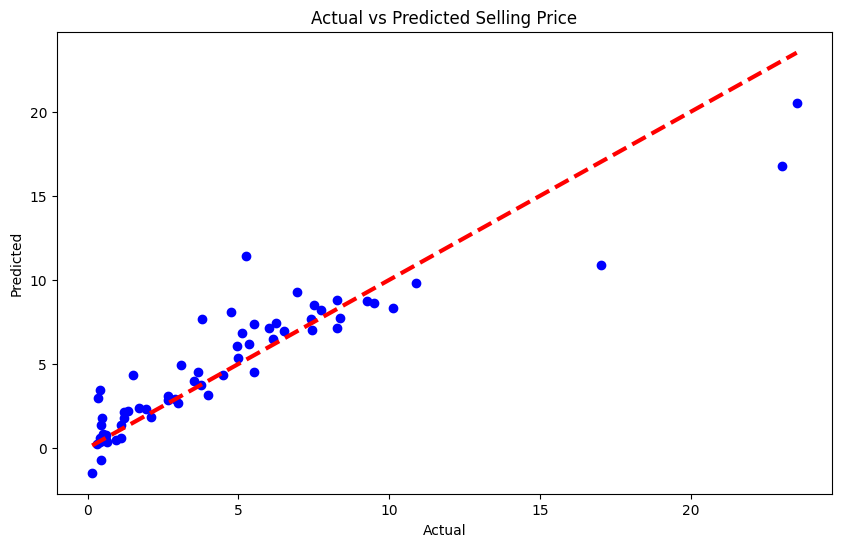

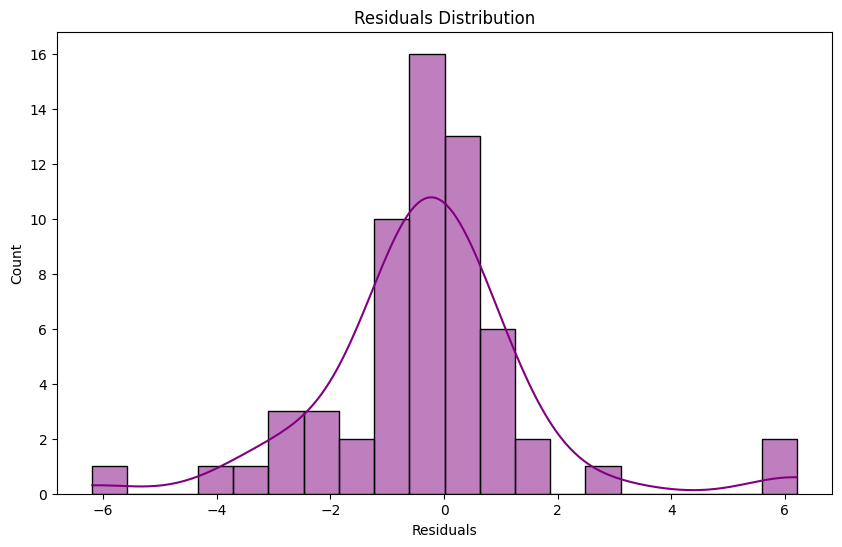

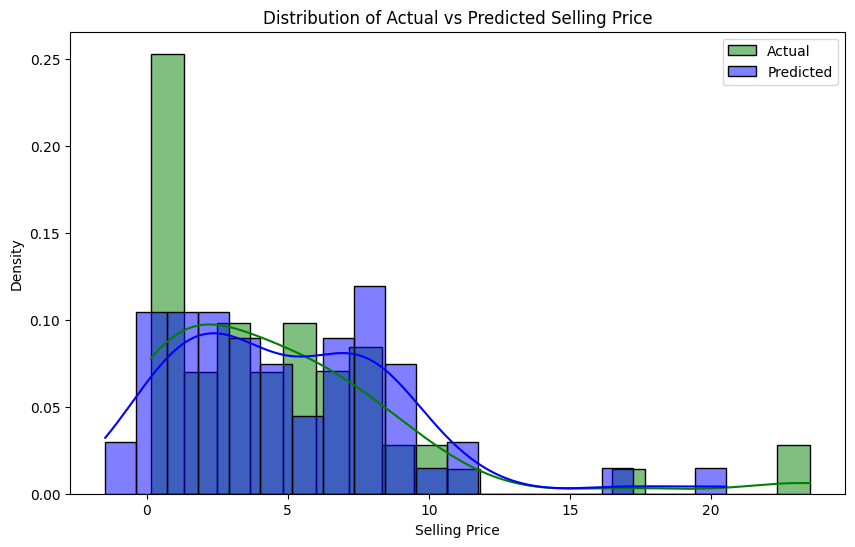

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Selling Price')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

# Plot distribution of predicted values vs actual values
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=20, kde=True, color='green', label='Actual', stat='density')
sns.histplot(y_pred, bins=20, kde=True, color='blue', label='Predicted', stat='density')
plt.xlabel('Selling Price')
plt.title('Distribution of Actual vs Predicted Selling Price')
plt.legend()
plt.show()
